### 실습 | LSTM을 이용해 로이터 뉴스 카테고리 분석하기

In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense
from keras.datasets import reuters
from keras.utils import pad_sequences, to_categorical
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

category = np.max(y_train) + 1
print(category, "카테고리")
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


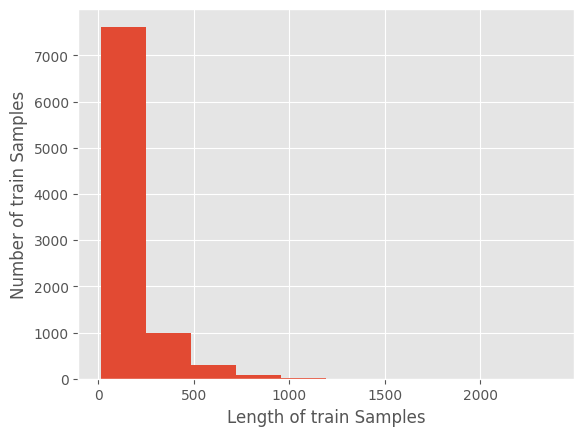

In [3]:
plt.hist([ len(x) for x in X_train ])
plt.xlabel('Length of train Samples')
plt.ylabel('Number of train Samples')
plt.show();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 500)         500000    
                                                                 
 lstm (LSTM)                 (None, 100)               240400    
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 745046 (2.84 MB)
Trainable params: 745046 (2.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
450/450 [==============================] - 436s 944ms/step - loss: 2.0256 - acc: 0.4938 - val_loss: 1.7521 - val_acc: 0.5770
Epoch 2/20
450/450 [==============================] - 375s 833ms/step - loss: 1.6410 - acc: 0.5920 - val_loss: 1.5161 - val_acc: 0.6282
Epoch 3/20
4

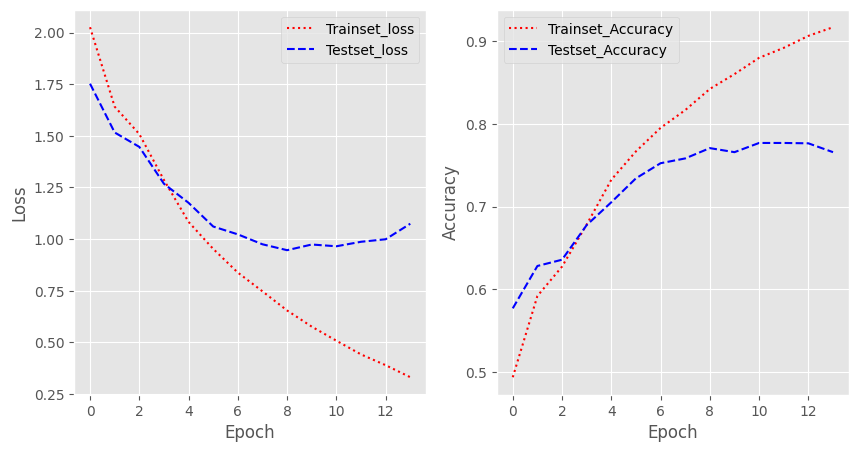

In [4]:
max_len = 500
word_size = 1000  # reuters.load_data의 num_words와 동일

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Embedding(input_dim=word_size, output_dim=max_len))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

model.summary()

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=['acc']
)

es = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, batch_size=20, epochs=20,
                    validation_data=(X_test, y_test), callbacks=[es])

print("\nTest Accuracy : %.4f" % (model.evaluate(X_test, y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']
y_vacc = history.history['val_acc']
y_acc = history.history['acc']

epoch = np.arange(len(y_loss))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epoch, y_loss, 'r:', label='Trainset_loss')
plt.plot(epoch, y_vloss, 'b--', label='Testset_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(epoch, y_acc, 'r:', label='Trainset_Accuracy')
plt.plot(epoch, y_vacc, 'b--', label='Testset_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show();

### 실습 | LSTM과 CNN을 조합해 영화 리뷰 분류하기

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.utils import pad_sequences
from keras.callbacks import EarlyStopping
from keras.datasets import imdb

import numpy as np
import matplotlib.pyplot as plt

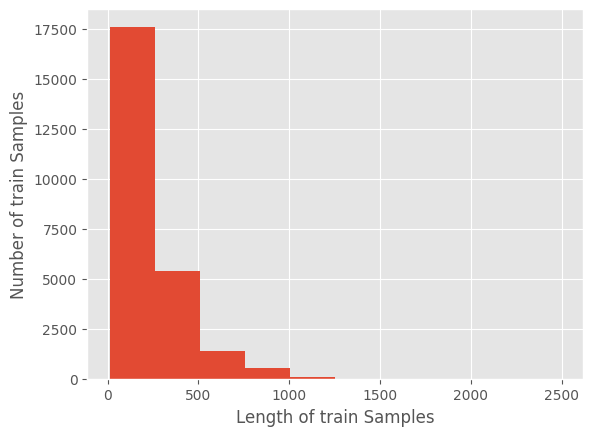

In [6]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

plt.hist([ len(x) for x in X_train ])
plt.xlabel('Length of train Samples')
plt.ylabel('Number of train Samples')
plt.show();

In [7]:
max_len = 1000
word_size = 5000

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

model = Sequential()
model.add(Embedding(input_dim=word_size, output_dim=max_len))
model.add(Dropout(0.5))
model.add(Conv1D(filters=64, kernel_size=5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['acc'])

es = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_split=0.25)

print("\nTest Accuracy : %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1/10
586/586 [==============================] - 857s 1s/step - loss: 0.3738 - acc: 0.8297 - val_loss: 0.3039 - val_acc: 0.8776
Epoch 2/10
586/586 [==============================] - 844s 1s/step - loss: 0.2105 - acc: 0.9188 - val_loss: 0.2774 - val_acc: 0.8850
Epoch 3/10
586/586 [==============================] - 768s 1s/step - loss: 0.1360 - acc: 0.9508 - val_loss: 0.3344 - val_acc: 0.8846
Epoch 4/10
586/586 [==============================] - 765s 1s/step - loss: 0.0753 - acc: 0.9749 - val_loss: 0.3519 - val_acc: 0.8899
Epoch 5/10
586/586 [==============================] - 785s 1s/step - loss: 0.0535 - acc: 0.9825 - val_loss: 0.4536 - val_acc: 0.8854
Epoch 6/10
586/586 [==============================] - 903s 2s/step - loss: 0.0397 - acc: 0.9871 - val_loss: 0.4568 - val_acc: 0.8845
Epoch 7/10
586/586 [==============================] - 860s 1s/step - loss: 0.0270 - acc: 0.9917 - val_loss: 0.5096 - val_acc: 0.8755
Epoch 8/10
586/586 [==============================] - 887s 2s/step - 

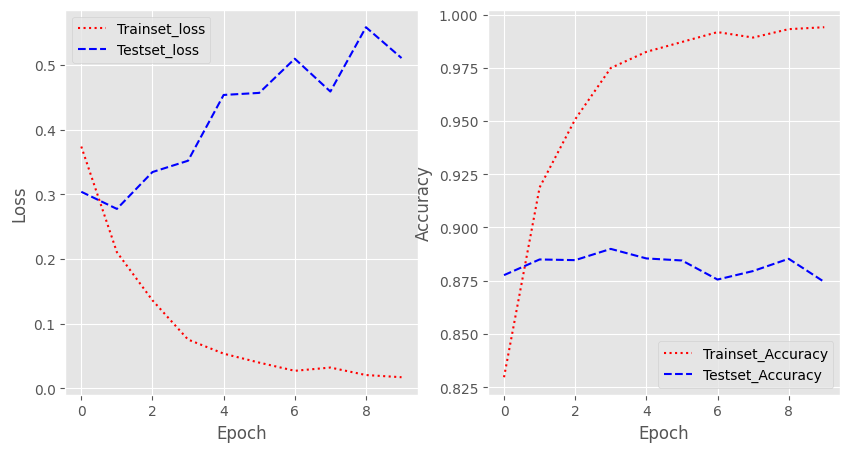

In [8]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
y_vacc = history.history['val_acc']
y_acc = history.history['acc']

epoch = np.arange(len(y_loss))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epoch, y_loss, 'r:', label='Trainset_loss')
plt.plot(epoch, y_vloss, 'b--', label='Testset_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(epoch, y_acc, 'r:', label='Trainset_Accuracy')
plt.plot(epoch, y_vacc, 'b--', label='Testset_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show();